<a href="https://colab.research.google.com/github/soltiste/ii-in-economi/blob/main/mltask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет https://archive.ics.uci.edu/dataset/162/forest+fires
Метрика RMSE

Категориальные признаки закодировать с помощью OneHotEncoder

Не забыть разбить на train и test

Обработать выбросы

Обучить сначала обычную линейную регрессию

Провести отбор признаков с помощью RFE https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

Обучить линейную регрессию с наилучшим количеством признаков

Обучить Ridge и Lasso регрессию


 +нормализовать признаки

In [127]:
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
sklearn.__version__
from google.colab.data_table import DataTable
DataTable.max_columns = 35

In [128]:
data = pd.read_csv('/content/drive/MyDrive/forestfires.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


1) Кодирую категориальные признаки

In [129]:
df_ohe = data.copy()
onehotencoder = OneHotEncoder(sparse = False)
encoded_df = pd.DataFrame(onehotencoder.fit_transform(df_ohe[['month']]))
encoded_df.columns = onehotencoder.get_feature_names_out()
encoded_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
df_ohe.drop('month', axis = 1, inplace = True)

In [131]:
df_ohe

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [132]:
df = df_ohe.copy()
onehotencoder1 = OneHotEncoder(sparse = False)
encoded_df1 = pd.DataFrame(onehotencoder1.fit_transform(df[['day']]))
encoded_df1.columns = onehotencoder1.get_feature_names_out()
encoded_df1

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
512,0.0,0.0,0.0,1.0,0.0,0.0,0.0
513,0.0,0.0,0.0,1.0,0.0,0.0,0.0
514,0.0,0.0,0.0,1.0,0.0,0.0,0.0
515,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [133]:
df.drop('day', axis = 1, inplace = True)
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [134]:
df['area'] = np.log1p(df['area'])

Нормализирую признаки

In [138]:
mm_scal = MinMaxScaler()
df_n = mm_scal.fit_transform(df[['X', 'Y', 'FFMC',
                                                   'DMC', 'DC', 'ISI',
                                                   'temp', 'RH', 'wind',
                                                   'rain', 'area']])
df_nor = pd.DataFrame(df_n, columns=['X', 'Y', 'FFMC',
                                                   'DMC', 'DC', 'ISI',
                                                   'temp', 'RH', 'wind',
                                                   'rain', 'area'])
df_nor = df_nor.join(encoded_df)
df = df_nor.join(encoded_df1)
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.458656,0.328544,0.928318,0.378264,0.633329,0.160814,0.536629,0.344567,0.401956,0.003385,...,0.001934,0.029014,0.332689,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,0.289222,0.175700,0.071227,0.220698,0.290918,0.081274,0.186708,0.191970,0.199073,0.046244,...,0.043980,0.168007,0.471632,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.285714,0.922581,0.232598,0.504046,0.115865,0.427653,0.211765,0.255556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.375000,0.285714,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.428571,0.957419,0.486906,0.827958,0.192513,0.662379,0.447059,0.500000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
z = np.abs(df.apply(stats.zscore))
df_clean_by_z = df[(z<3).all(axis=1)]
df_clean_by_z.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,...,392.0,392.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.427615,0.315598,0.942752,0.425373,0.704777,0.169454,0.562578,0.330582,0.393084,0.000797,...,0.0,0.0,0.426020,0.165816,0.137755,0.153061,0.181122,0.130102,0.125000,0.107143
std,0.285208,0.159735,0.029915,0.206219,0.255417,0.066647,0.161378,0.175505,0.182918,0.009449,...,0.0,0.0,0.495129,0.372391,0.345083,0.360507,0.385612,0.336846,0.331142,0.309690
min,0.000000,0.000000,0.811613,0.047898,0.020758,0.033868,0.099678,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.285714,0.931613,0.305393,0.701184,0.126560,0.467846,0.200000,0.255556,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.375000,0.285714,0.943226,0.406272,0.789023,0.151515,0.564309,0.305882,0.377778,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.625000,0.428571,0.958710,0.503790,0.845198,0.201426,0.665595,0.435294,0.500000,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.571429,1.000000,1.000000,1.000000,0.402852,1.000000,0.858824,0.944444,0.125000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

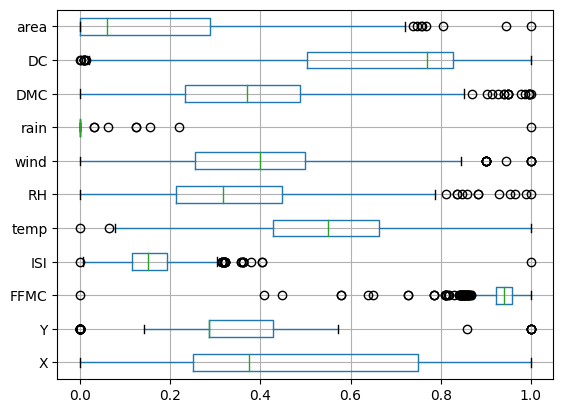

In [140]:
df.boxplot(column=['X', 'Y', 'FFMC', 'ISI', 'temp',
                   'RH', 'wind', 'rain','DMC', 'DC', 'area'],
           vert=False)

<Axes: >

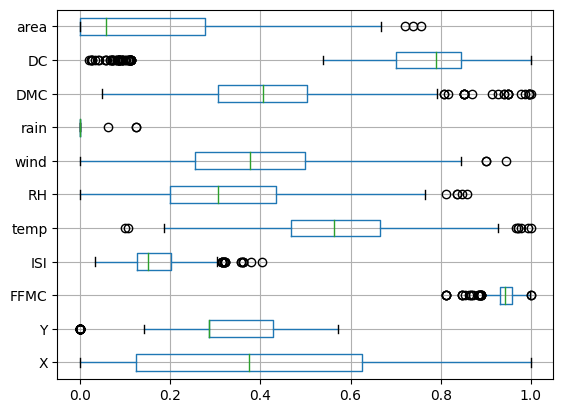

In [141]:
df_clean_by_z.boxplot(column=['X', 'Y', 'FFMC', 'ISI', 'temp',
                   'RH', 'wind', 'rain','DMC', 'DC', 'area'],
           vert=False)

3) После очистки разделяю данные на train и test

In [143]:
X = df_clean_by_z.drop('area', axis=1)
y = df_clean_by_z['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    random_state = 42)

4) Обучаю обычную линейную регрессию

In [144]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, y_train)

LinearRegression()

In [145]:
test_preds = model.predict(X_test)

И считаю RMSE

In [146]:
np.sqrt(((y_test - test_preds) ** 2).mean())

0.19347184721465624

При построении линейной регрессии вышло, что значения area ушли в минус, но такого быть не может

<Axes: >

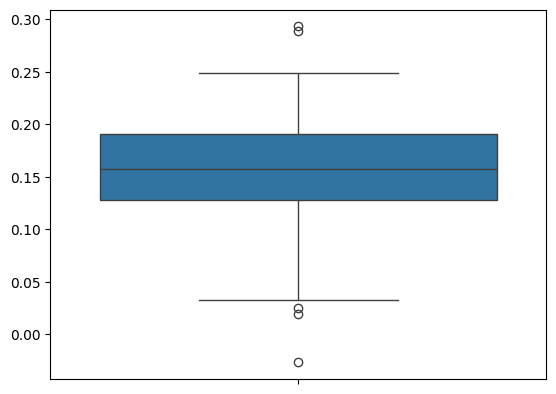

In [147]:
sns.boxplot(data = test_preds)

<Axes: ylabel='area'>

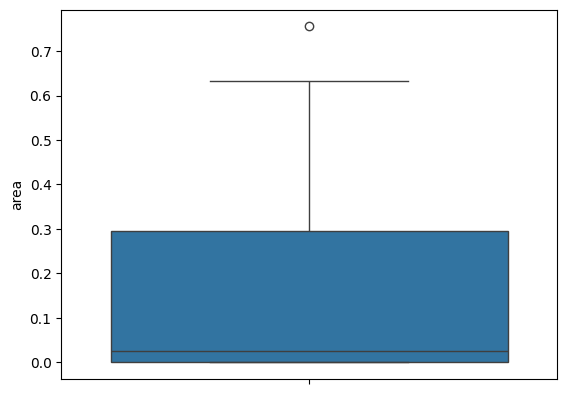

In [90]:
sns.boxplot(data = y_test)

5) Провожу отбор признаков по RFE и обучаю линейную регрессию на пробном значении параметра количества колонок

In [92]:
rfe = RFE(model, n_features_to_select = 4)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print(selected_features)

Index(['Y', 'FFMC', 'temp', 'rain'], dtype='object')


In [93]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)
test_pred_selected = model.predict(X_test_selected)

In [94]:
np.sqrt(((y_test - test_pred_selected) ** 2).mean())

0.19027428035222757

In [95]:
rfe = RFE(model, n_features_to_select = 5)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)
test_pred_selected = model.predict(X_test_selected)
np.sqrt(((y_test - test_pred_selected) ** 2).mean())

0.19245704594511215

In [96]:
rfe = RFE(model, n_features_to_select = 6)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)
test_pred_selected = model.predict(X_test_selected)
np.sqrt(((y_test - test_pred_selected) ** 2).mean())

0.19405302456598536

In [97]:
rfe = RFE(model, n_features_to_select = 10)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)
test_pred_selected10 = model.predict(X_test_selected)
np.sqrt(((y_test - test_pred_selected10) ** 2).mean())

0.1942121970542377

In [98]:
rfe = RFE(model, n_features_to_select = 3)
rfe.fit(X_train, y_train)
selected_features3 = X_train.columns[rfe.support_]
X_train_selected3 = X_train[selected_features3]
X_test_selected3 = X_test[selected_features3]
model.fit(X_train_selected3, y_train)
test_pred_selected3 = model.predict(X_test_selected3)
np.sqrt(((y_test - test_pred_selected3) ** 2).mean())

0.1866009616988252

In [99]:
rfe = RFE(model, n_features_to_select = 2)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)
test_pred_selected2 = model.predict(X_test_selected)
np.sqrt(((y_test - test_pred_selected2) ** 2).mean())

0.1843362721333607

Рассмотрим 2, 3 и 10 признаков

<Axes: >

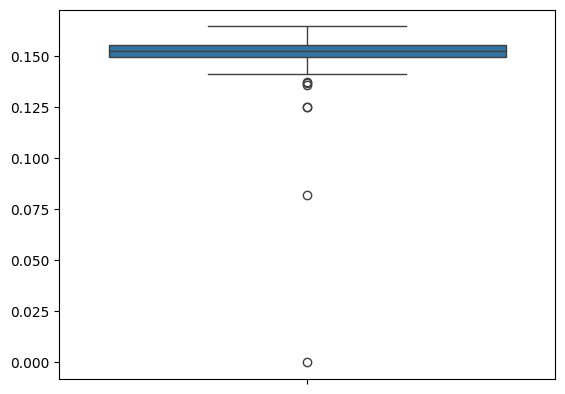

In [100]:
sns.boxplot(data = test_pred_selected2)

<Axes: >

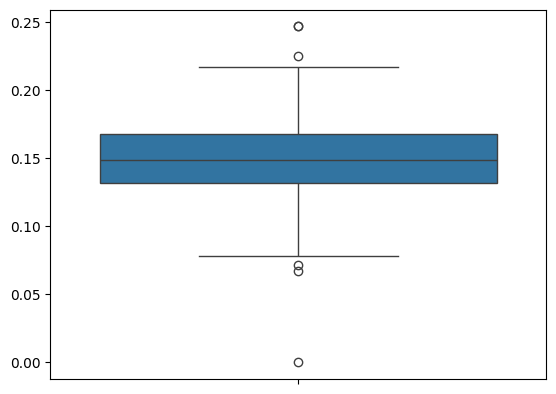

In [103]:
sns.boxplot(data = test_pred_selected3)

<Axes: >

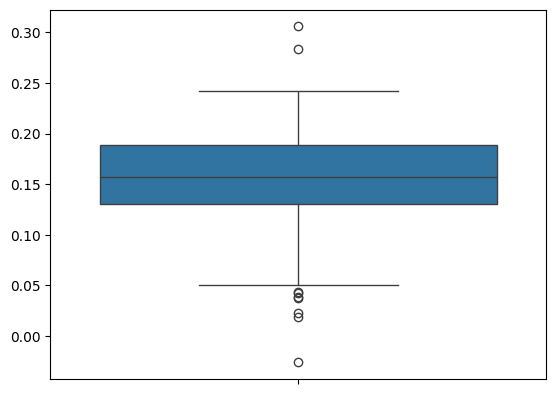

In [101]:
sns.boxplot(data = test_pred_selected10)

<Axes: ylabel='area'>

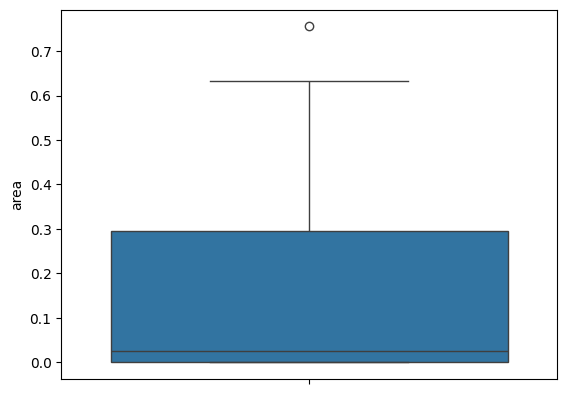

In [102]:
sns.boxplot(data = y_test)

6) Обучаю Ridge и Lasso регрессию

Ridge регрессия

In [104]:
ridge_model = Ridge(alpha=15)
ridge_model.fit(X_train_selected3, y_train)
ridge_y_pred = ridge_model.predict(X_test_selected3)
np.sqrt(((y_test - ridge_y_pred) ** 2).mean())

0.18526067392228063

<Axes: >

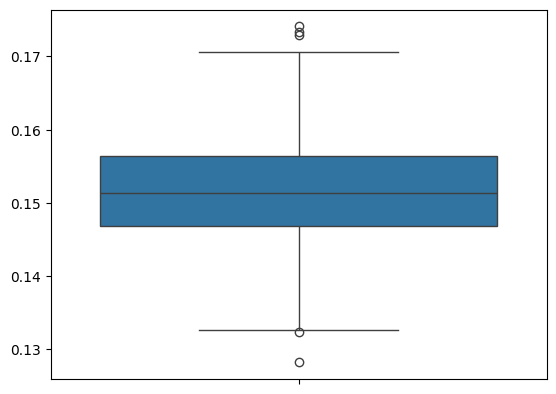

In [105]:
sns.boxplot(data = ridge_y_pred)

Lasso регрессия

In [106]:
lasso_model = Lasso(alpha=0.0025)
lasso_model.fit(X_train_selected3, y_train)
lasso_y_pred = lasso_model.predict(X_test_selected3)
np.sqrt(((y_test - lasso_y_pred) ** 2).mean())

0.185420862544087

<Axes: >

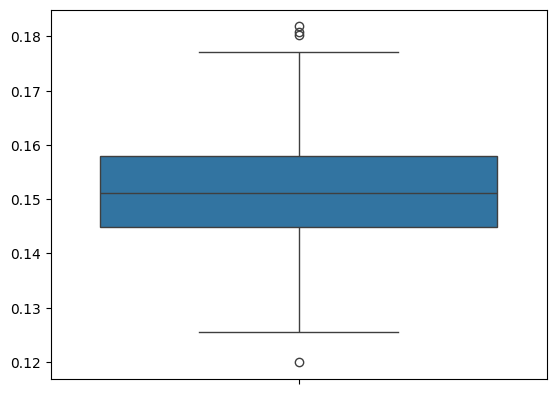

In [107]:
sns.boxplot (data = lasso_y_pred)